# <center>Telco Churn Prediction - EDA + ML Classification</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Feature Data Analysis](#Feature_Data_Analysis)
    - [Feature Relationship Analysis](#Feature_Relationship_Analysis)
    - [Data Correlation](#Data_Correlation)
8. [Data Preparation](#Data_Preparation)
9. [Model Development](#Model_Development)
    - [Decision Tree Classifier with GridSearch (grid_dtc)](#Decision_Tree_Classifier_with_GridSearch_(grid_dtc))
    - [Random Forest Classifier with GridSearch (grid_rfc)](#Random_Forest_Classifier_with_GridSearch_(grid_rfc))
    - [Extreme Gradient Boost with GridSearch (grid_xgb)](#Extreme_Gradient_Boost_with_GridSearch_(grid_xgb))
10. [Model Comparison](#Model_Comparison)
11. [Conclusion](#Conclusion)
12. [Recommendation](#Recommendation)

## <a id='Background' href=#1> Background </a>

This project aims to predict customer churn in the telecommunications industry. Customer churn occurs when customers or subscribers cease using the services of a company. In this case, churn refers to customers ending their subscription or plan or switching to another service provider.

The telecommunications industry is highly competitive as there are many telecomunication companies which provide similar services. The wide variety of service providers to choose from causes this industry to be competitive. Hence, it is crucial to retain customers for business sustainability. Churn prediction can help telecom companies identify customers at risk of leaving, allowing them to take proactive measures to retain those customers. It also provides insight into key features of subscriptions which enhances customer retention.

The dataset used for this project contains information regarding customers who are still subscribed to the company services and customers who left within the last month. The services that each customer has signed up for such as phone, multiple lines, internet, online security, online backup, device protection, tech support, TV streaming and movie streaming are included. Customer account information such as how long they've been a customer, contract, payment method, paperless billing, monthly charges and total charges are also included. Lastly, customers demographic like gender, age range, partners and dependents can also be found in the dataset.

Based on this dataset, a classification model will be developed to assist telco companies to accurately predict the churn of customers. Besides that, the model will also help telco companies identify customers at risk of leaving, along with key features that their subscription plan needs in order to retain customers.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **develop a classification model which can predict the churn of customers.**

The *secondary* objectives of this project are:
1. To identify **customers at risk of leaving.**
2. To **determine key subscription features** that will retain customers.

## <a id='Feature_Information' href=#1> Feature Information </a>

- **customerID**: Unique customer ID
- **gender**: Whether the customer is male of female
- **SeniorCitizen**: Whether the customer is a senior citizen or not
- **Partner**: Whether the customer has a partner or not
- **Dependents**: Whether the customer has dependents or not
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not
- **MultipleLines**: Whether the customer has multiple lines or not
- **InternetService**: Customers internet service provider
- **OnlineSecurity**: Whether the customer has online security or not
- **OnlineBackup**: Whether the customer has online backup or not
- **DeviceProtection**: Whether the customer has device protection or not
- **TechSupport**: Whether the customer has tech support or not
- **StreamingTV**: Whether the customer has TV streaming or not
- **StreamingMovies**: Whether the customer has movie streaming or not
- **Contract**: The contract term of the customer
- **PaperlessBilling**: Whether the customer has paperless billing or not
- **PaymentMethod**: The customers payment method
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer across their tenure
- **Churn**: Whether the customer churned or not

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## <a id='Data_Loading' href=#1> Data Loading </a>

Load the dataset to be used for analysis and model development.

In [2]:
df_original = pd.read_csv('Telco-Customer-Churn.csv')
df = df_original.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Clean the dataset and perform data wrangling.

Check for any duplicated data:

In [5]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')
# df.drop_duplicates(inplace = True)
# print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Check the dataset shape and data type:

Looks like our dataset has 7032 rows, 21 columns, no missing data and the data types of each feature are correct.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


Explore the dataset using descriptive statistics:

In [8]:
num_col = df.select_dtypes(include = 'number').describe()
num_col.transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [9]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Remove unique identifier 'customerID':

In [10]:
# Remove unique identifier from DF
df.drop('customerID', axis = 1, inplace = True)

cat_col = df.select_dtypes(include = 'object').describe()
cat_col.transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


In [11]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column gender:     
['Female' 'Male']     

Unique values in column Partner:     
['Yes' 'No']     

Unique values in column Dependents:     
['No' 'Yes']     

Unique values in column PhoneService:     
['No' 'Yes']     

Unique values in column MultipleLines:     
['No phone service' 'No' 'Yes']     

Unique values in column InternetService:     
['DSL' 'Fiber optic' 'No']     

Unique values in column OnlineSecurity:     
['No' 'Yes' 'No internet service']     

Unique values in column OnlineBackup:     
['Yes' 'No' 'No internet service']     

Unique values in column DeviceProtection:     
['No' 'Yes' 'No internet service']     

Unique values in column TechSupport:     
['No' 'Yes' 'No internet service']     

Unique values in column StreamingTV:     
['No' 'Yes' 'No internet service']     

Unique values in column StreamingMovies:     
['No' 'Yes' 'No internet service']     

Unique values in column Contract:     
['Month-to-month' 'One year' 'Two year']     

Un

## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

Explore and gain insights from the data through visualization.

### <a id='Feature_Data_Analysis' href=#1> Feature Data Analysis </a>

Explore the features in the dataset:

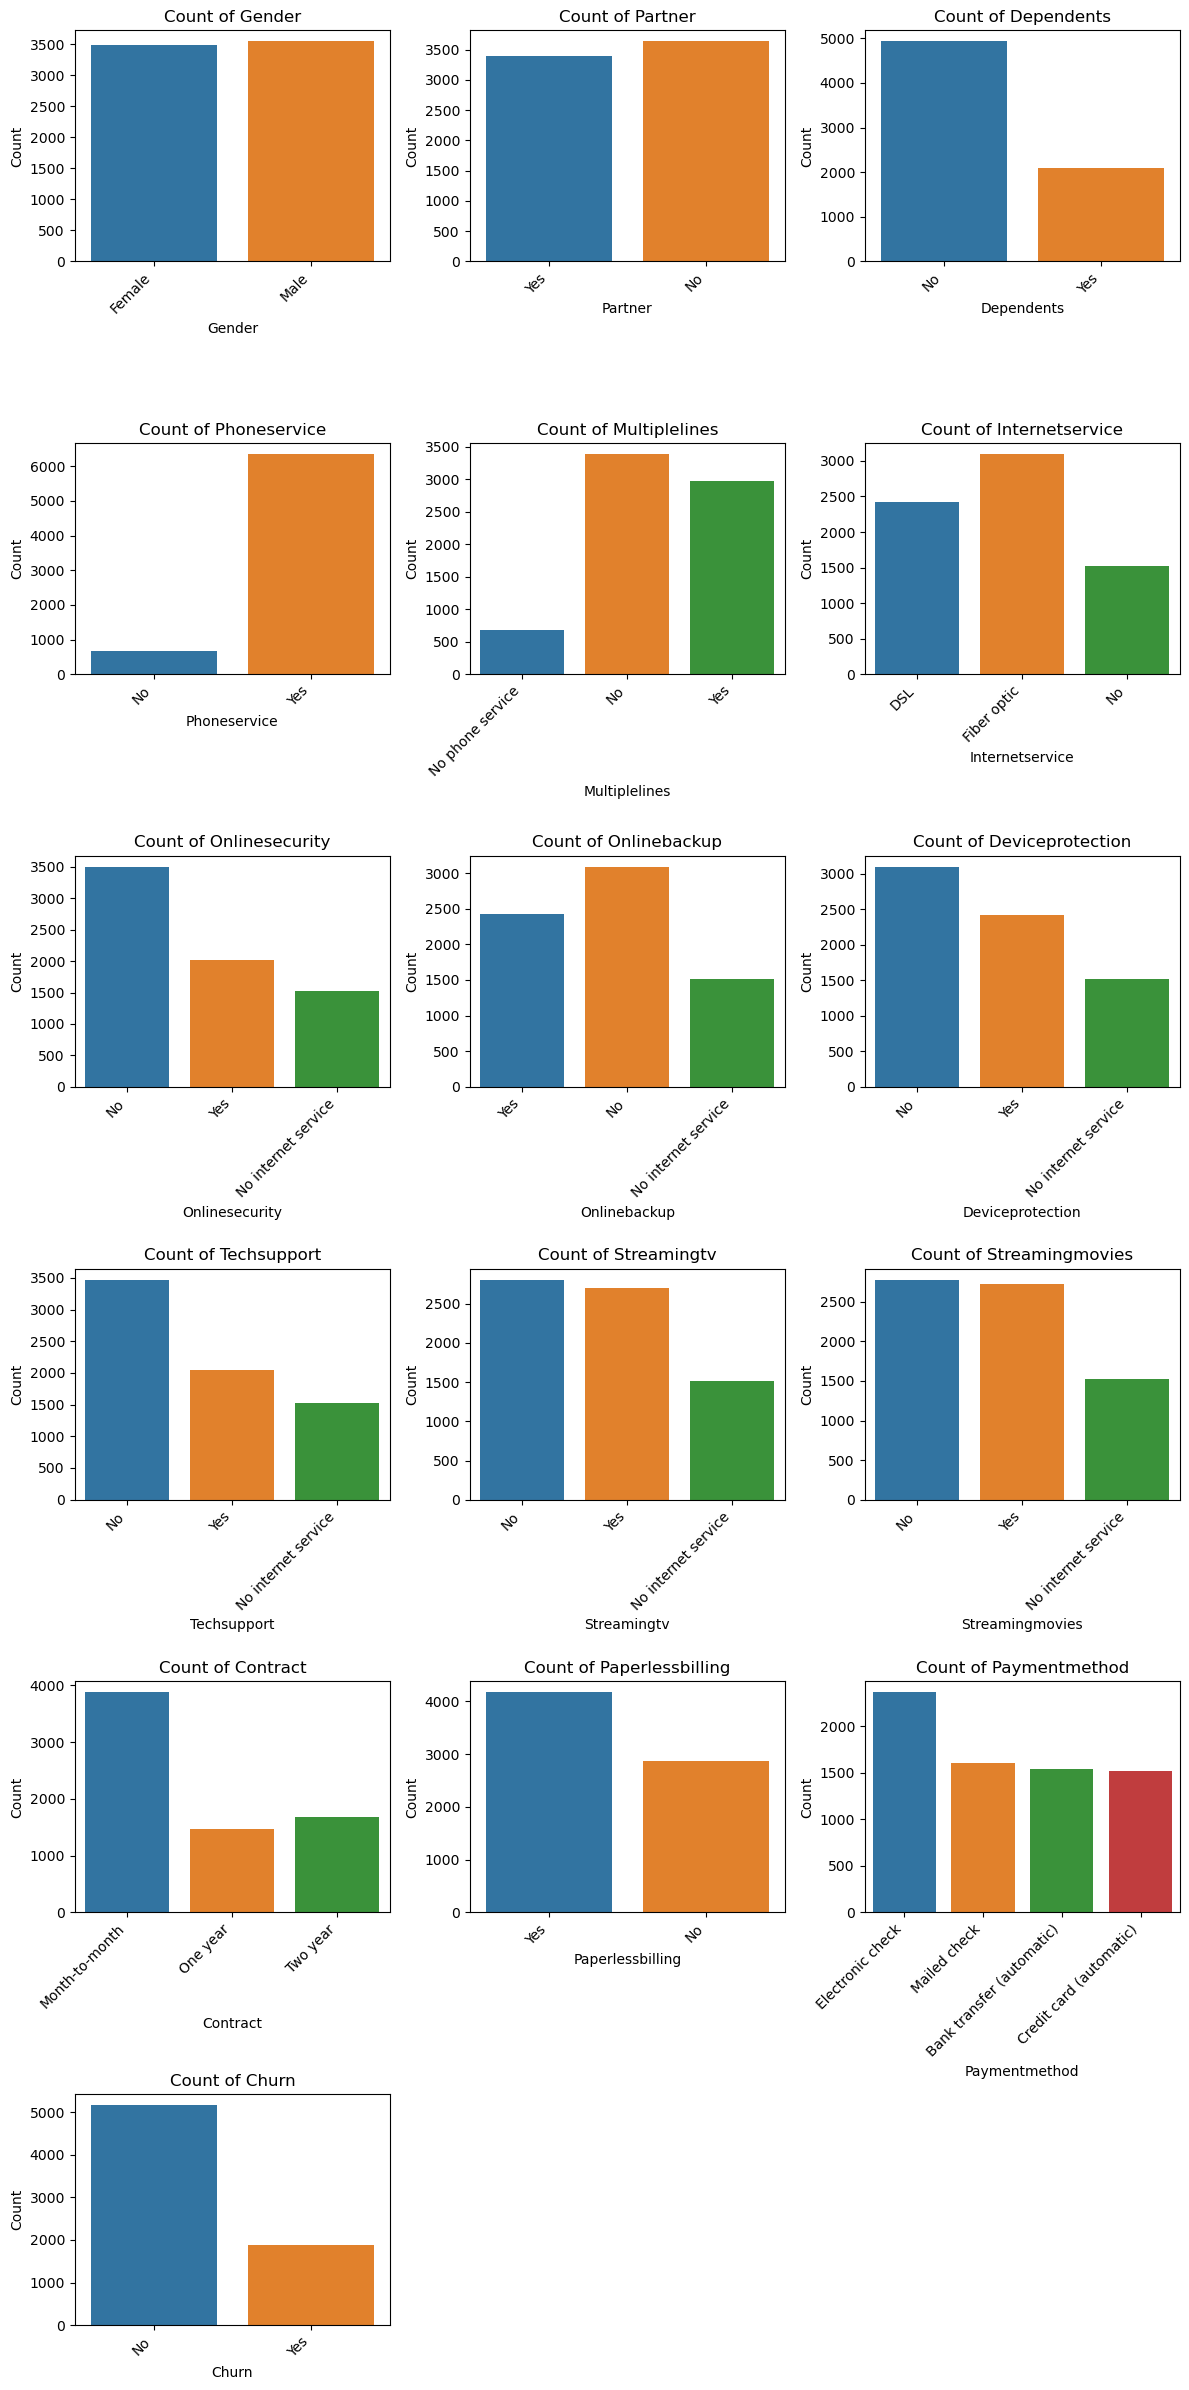

In [12]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (12, 6*4))
row_col = [(0, 0), (0, 1), (0, 2),
           (1, 0), (1, 1), (1, 2),
           (2, 0), (2, 1), (2, 2),
           (3, 0), (3, 1), (3, 2),
           (4, 0), (4, 1), (4, 2),
           (5, 0), (5, 1), (5, 2)]

for i, cat_col_name in enumerate(cat_col):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax)
    ax.set_title(f'Count of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
fig.delaxes(axes[5, 1])
fig.delaxes(axes[5, 2])
plt.tight_layout()
plt.show()

By plotting count plots for the categorical features, we are able to visualize the distribution for each categorical feature.

Observation:
- The **gender split of customers are equal.**
- Customers who **have partners are almost equal to those without partners.**
- **Two thirds of customers have no dependents.**
- **Most customers subscribe to phone service,** with **almost equal split between having multiple and single lines**
- There are **more customers using fiber optic internet service.**
- Majority of customers **do not subscribe to online security, online backup, device protection and tech support services.**
- For customers with internet service, there is **almost equal split between those subscribed to tv and movie streaming and not.**
- **Majority of customers subscribe to month-to-month contract.** The remaining customers are almost an **equal split between 1 and 2 years.**
- Majority of customers **prefer paperless billing by providing payment through electronic check.**
- **26.58% of customers left within the last month.**

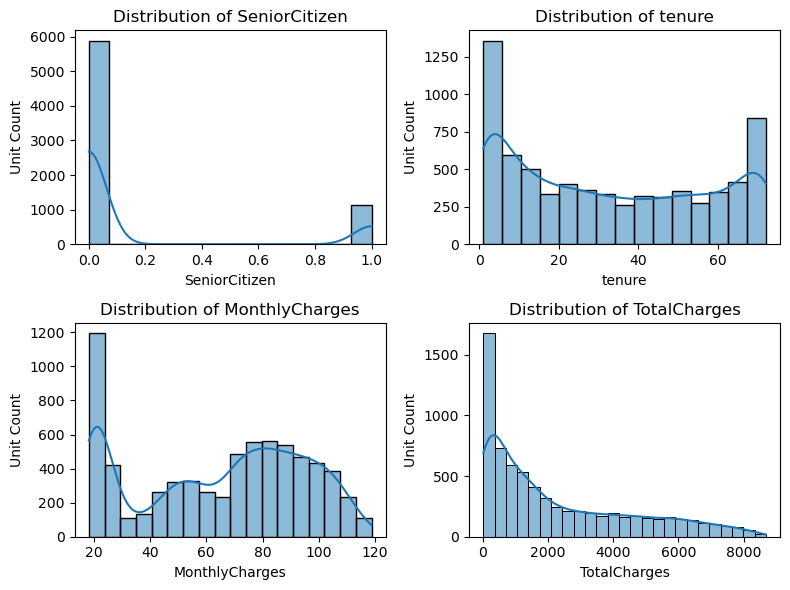

In [13]:
# Histogram for numerical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 2*3))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(num_col):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.histplot(data = df, x = num_col_name, kde = True, ax = ax)
    ax.set_title(f'Distribution of {num_col_name}')
    ax.set_xlabel(num_col_name)
    ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a histograms for the numerical features, we can visualize the distribution for each discrete and continuous feature.

Observation:
- Majority customers are **not senior citizens.**
- There is a **higher amount of customers whose tenure are between 0 - 5 years and above 70 years.**
- Most customers have **monthly charges below \\$25.**
- Majority of customers have **total charges below \\$350.**

### <a id='Feature_Relationship_Analysis' href=#1> Feature Relationship Analysis </a>

Analyse the relationship between the features:

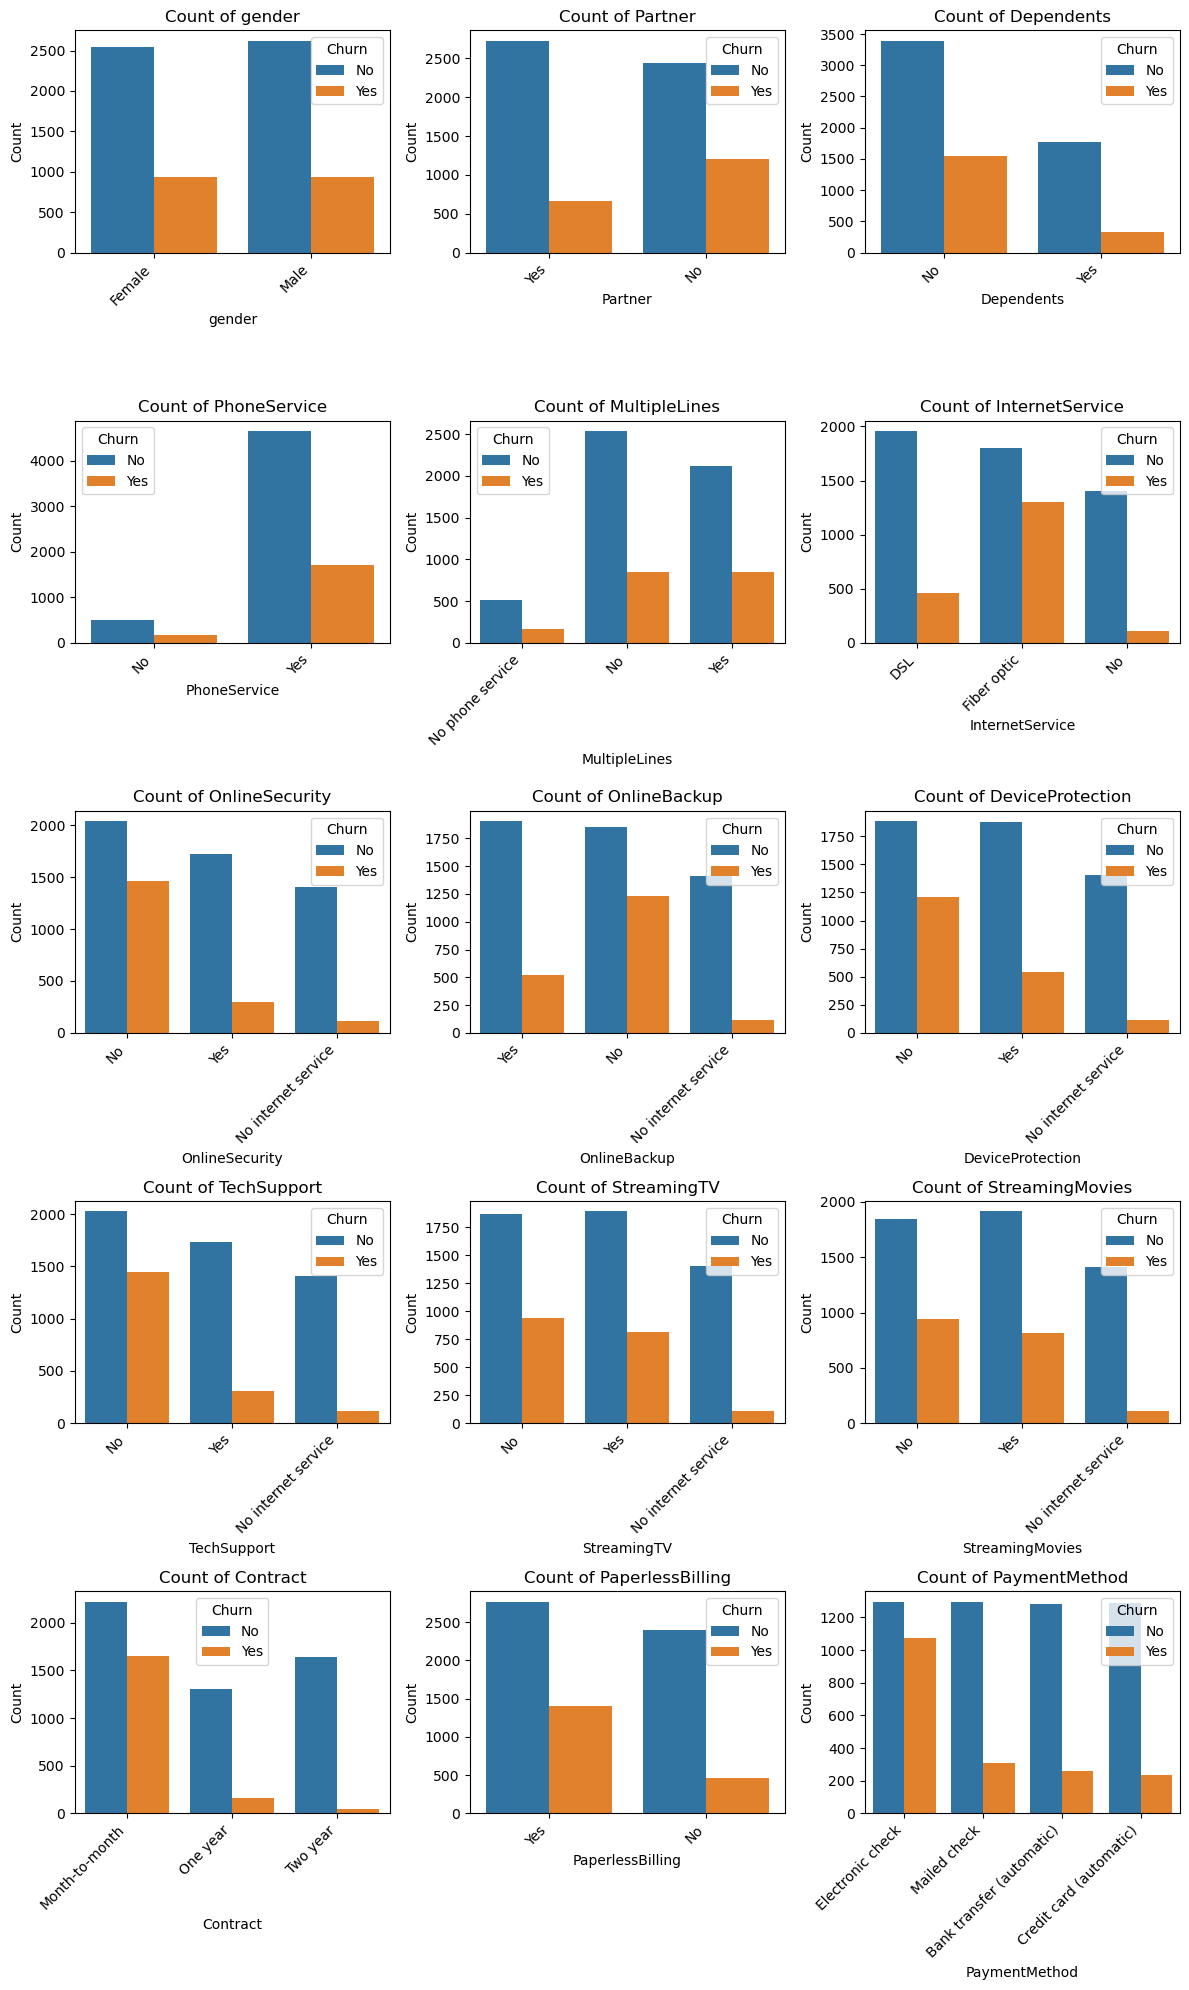

In [14]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (12, 5*4))
row_col = [(0, 0), (0, 1), (0, 2),
           (1, 0), (1, 1), (1, 2),
           (2, 0), (2, 1), (2, 2),
           (3, 0), (3, 1), (3, 2),
           (4, 0), (4, 1), (4, 2)]

for i, cat_col_name in enumerate(cat_col.columns[:-1]):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax, hue = 'Churn')
    ax.set_title(f'Count of {cat_col_name}')
    ax.set_xlabel(cat_col_name)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
# fig.delaxes(axes[5, 1])
# fig.delaxes(axes[5, 2])
plt.tight_layout()
plt.show()

By plotting count plots displaying the proportion of churn against categorical features, we can visualize the relationship between the 'Churn' against all feature attributes.

Observation:
- It looks like **more fibre optic users churn compared to DSL users.** The fibre optic internet service provided by the company should be looked into to find the main reason of this higher churn rate.
- There is typically **higher amount of customers that churn when they do not use the online security, online backup, device protection and tech support services.** Customers that use these services typically subscribe for these services throughout their device lifecycle. Hence, these customers would have lower churn rate.
- Customers who subscribe to **month-to-month contract have a higher churn rate** compared to those having 1 or 2 year contracts.
- Customers that use **electronic check as their payment method display a higher churn rate.** This is because customers who plans to use the service for short term will use this payment method to pay for their subscription. However, those who often resubscribe monthly or have a longer contract will use automated options for payment.

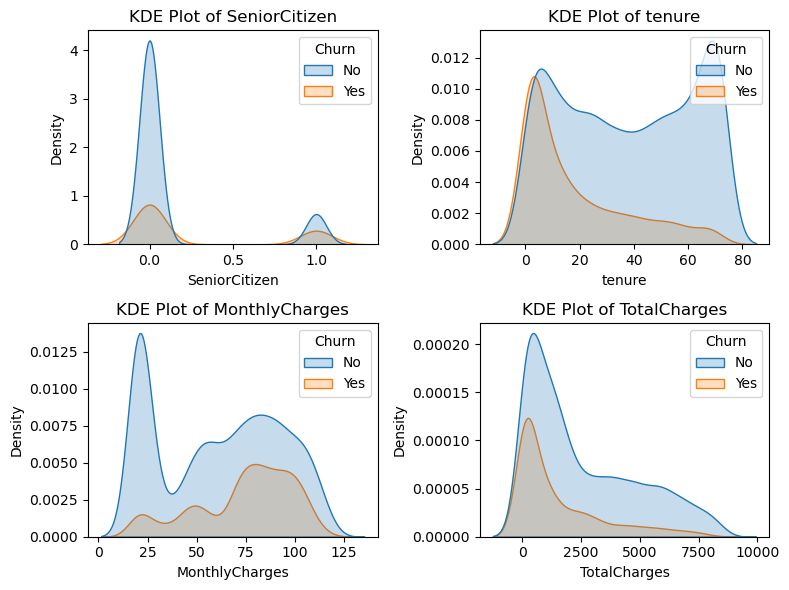

In [15]:
# KDE plot for continuous features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 2*3))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(num_col):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.kdeplot(data = df, x = num_col_name, ax = ax, hue = 'Churn', fill = True)
    ax.set_title(f'KDE Plot of {num_col_name}')
    ax.set_xlabel(num_col_name)
#     ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting KDE plots for continuous features, we can visualize the probability distribution of continuous features.

Observations:
- The probability of **customer churn is higher during the initial stages of service subscription.**
- Majority of customer **will not switch to a different service provider after using the services for a few years.**

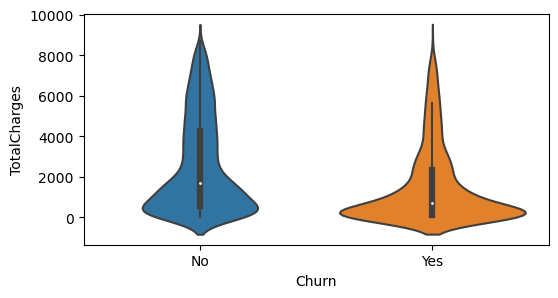

In [16]:
plt.figure(figsize = (6, 3))

sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges');

From the violin plot of total charges against churn, it is clear that **most customers that churn do so early on, when their total charges are still below \\$1,000.** This could be customers that planned to only subscribe the service for short term or customers that changed service providers early on due to dissatisfaction with the service. Customers who are satisfied with the service typically remain with the same service provider for long term.

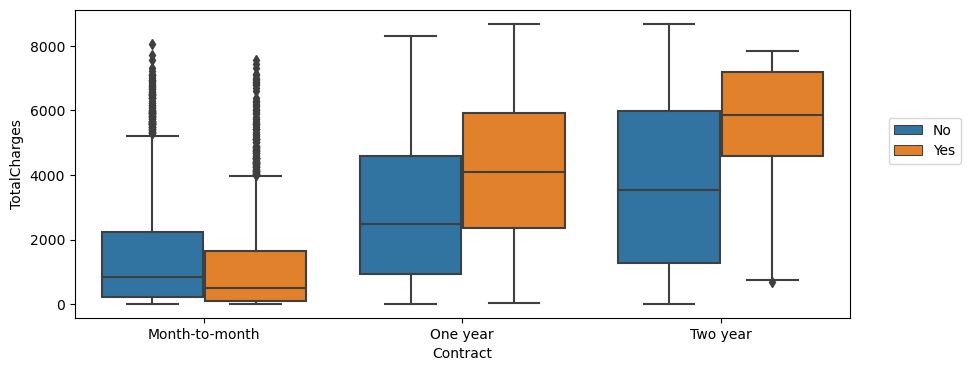

In [17]:
plt.figure(figsize = (10, 4))

sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')
plt.legend(loc = (1.05, 0.5));

By looking into detail on the box plot of total charges against contract types in terms of churn, we can see that **customers that discontinue their 1 or 2 year contract are paying more compared to other customers.** However, the total charges between those who have month-to-month contracts pay a similar amount. Hence, the reason for churn in those having monthly contracts are not pricing related.

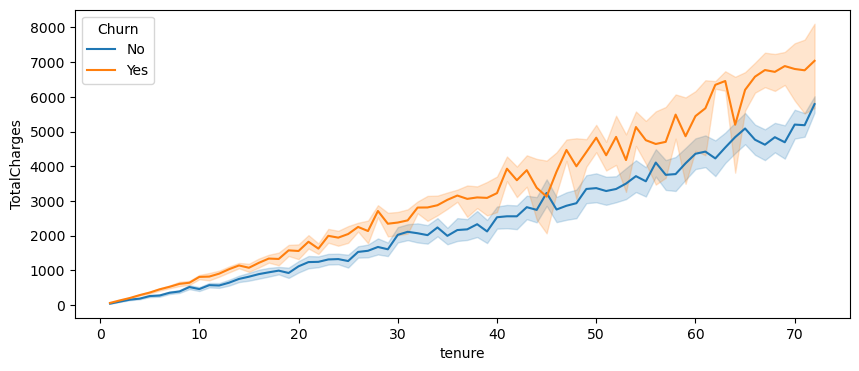

In [18]:
plt.figure(figsize = (10, 4))
sns.lineplot(data = df, x = 'tenure', y = 'TotalCharges', hue = 'Churn');

Customers who churn have higher charge for their contracts. As their tenure increase, their total charge increase exponentially.

<Figure size 1000x600 with 0 Axes>

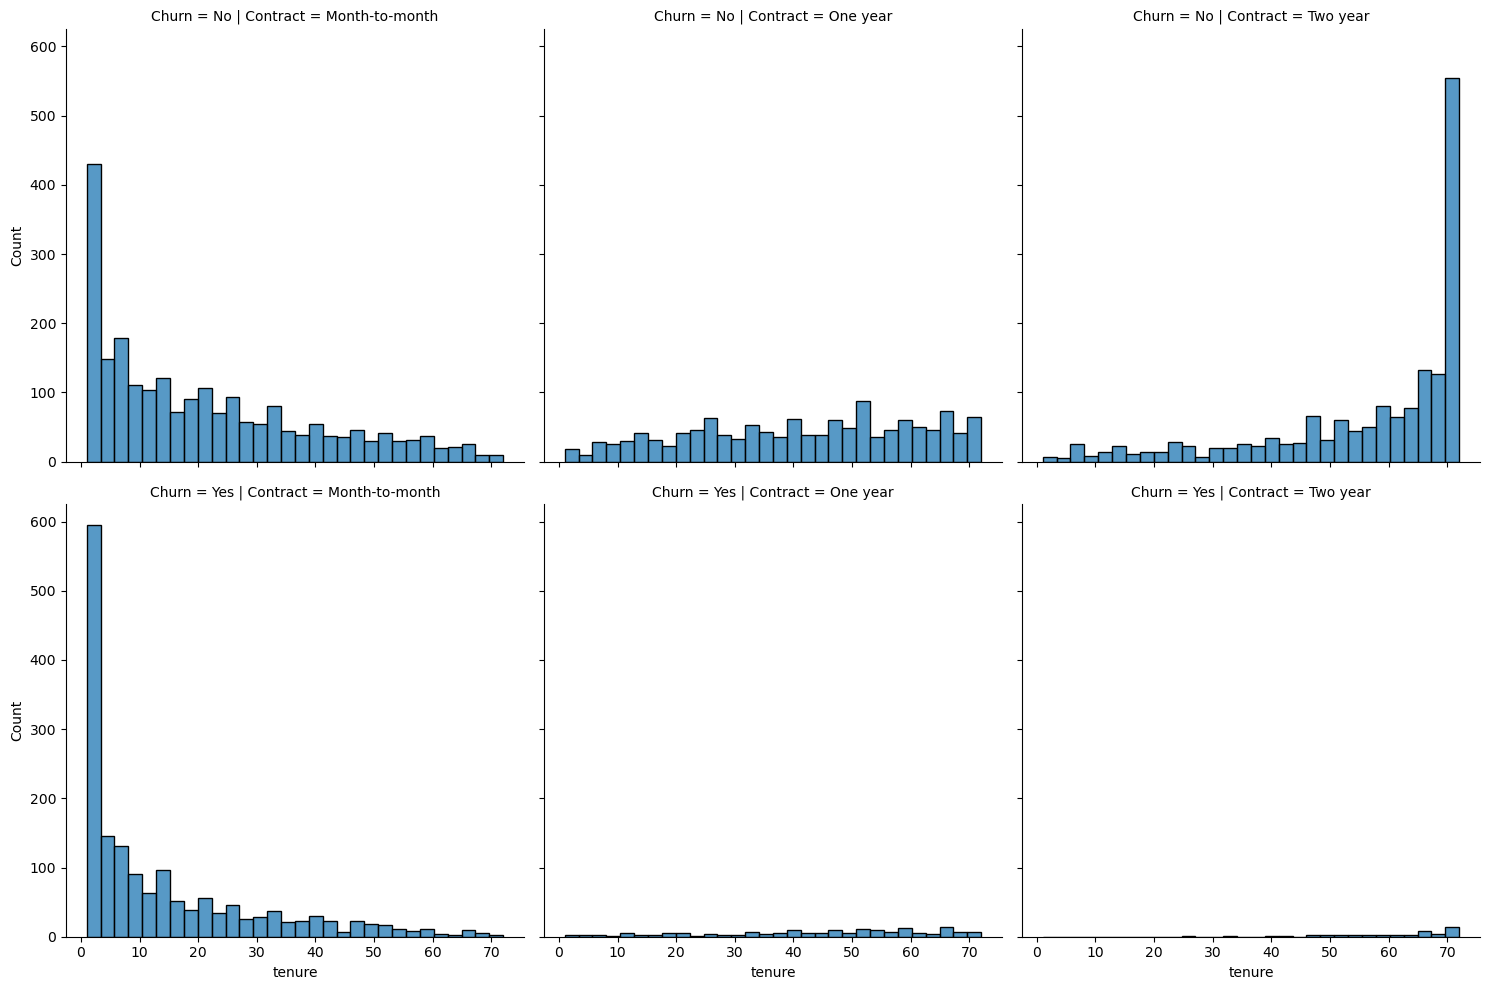

In [19]:
plt.figure(figsize = (10, 6))

sns.displot(data = df, x = 'tenure', bins = 30, col = 'Contract', row = 'Churn');

Customers subscribed to monthly contracts typically have shorter tenures while does who subscribe to 2 year contracts have longer tenures. **Majority of customers who end their subscription are subscribed to monthly contracts.**

In [20]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [21]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [22]:
churn_rate = churn_rate.transpose()['gender']
churn_rate.head()

tenure
1    61.990212
2    51.680672
3    47.000000
4    47.159091
5    48.120301
Name: gender, dtype: float64

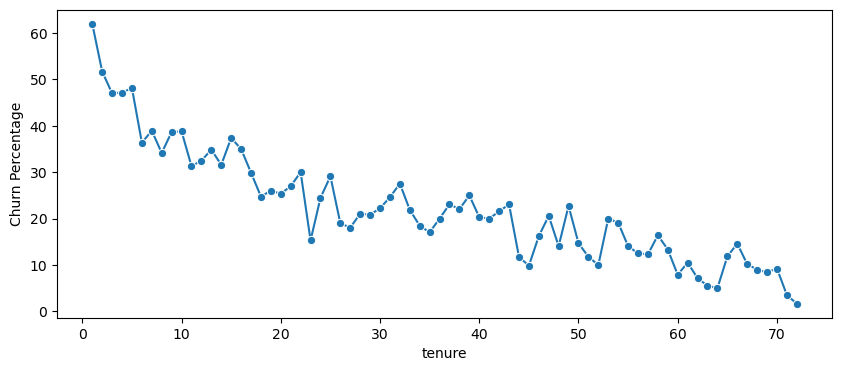

In [23]:
plt.figure(figsize = (10, 4))

sns.lineplot(x = churn_rate.index, y = churn_rate.values, marker = 'o')
plt.ylabel('Churn Percentage');

As the tenure of customers increase, the churn percentage decrease.

To look further into the tenure of customers, we will separate them into cohorts:

In [24]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [25]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [26]:
df.head()[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


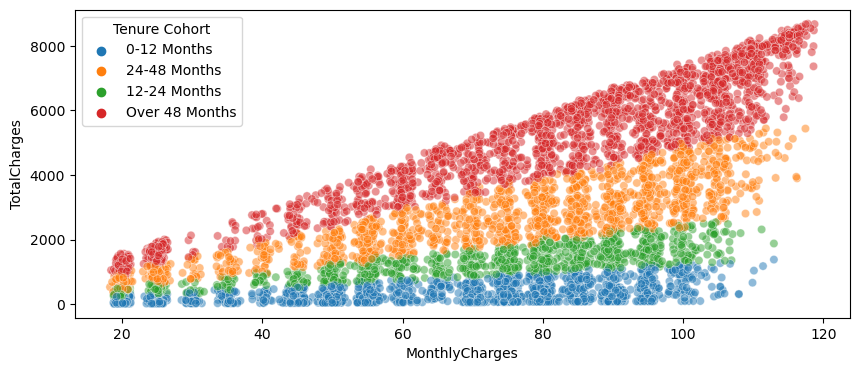

In [27]:
plt.figure(figsize = (10, 4))

sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', alpha = 0.5);

From the scatter plot, the exponential increase in total charges across the tenure for customers charged with high monthly charge is obvious.

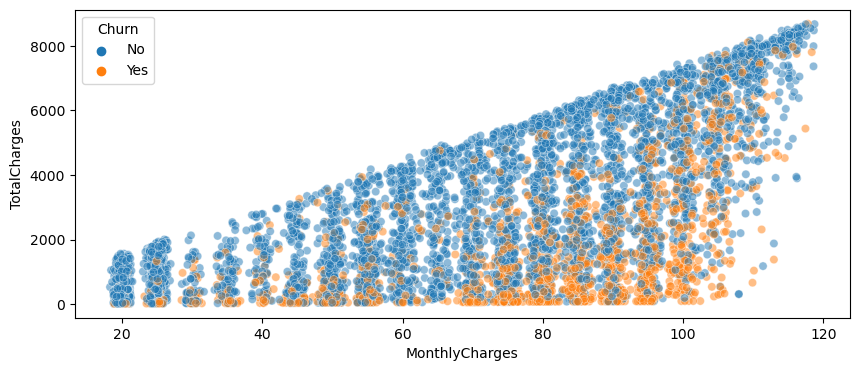

In [28]:
plt.figure(figsize = (10, 4))

sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', alpha = 0.5);

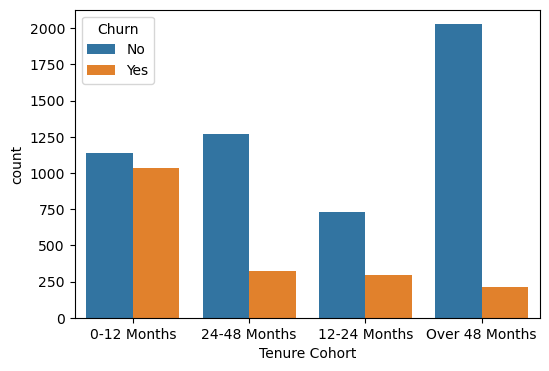

In [29]:
plt.figure(figsize = (6, 4))

sns.countplot(data = df, x = 'Tenure Cohort', hue = 'Churn');

<Figure size 1000x600 with 0 Axes>

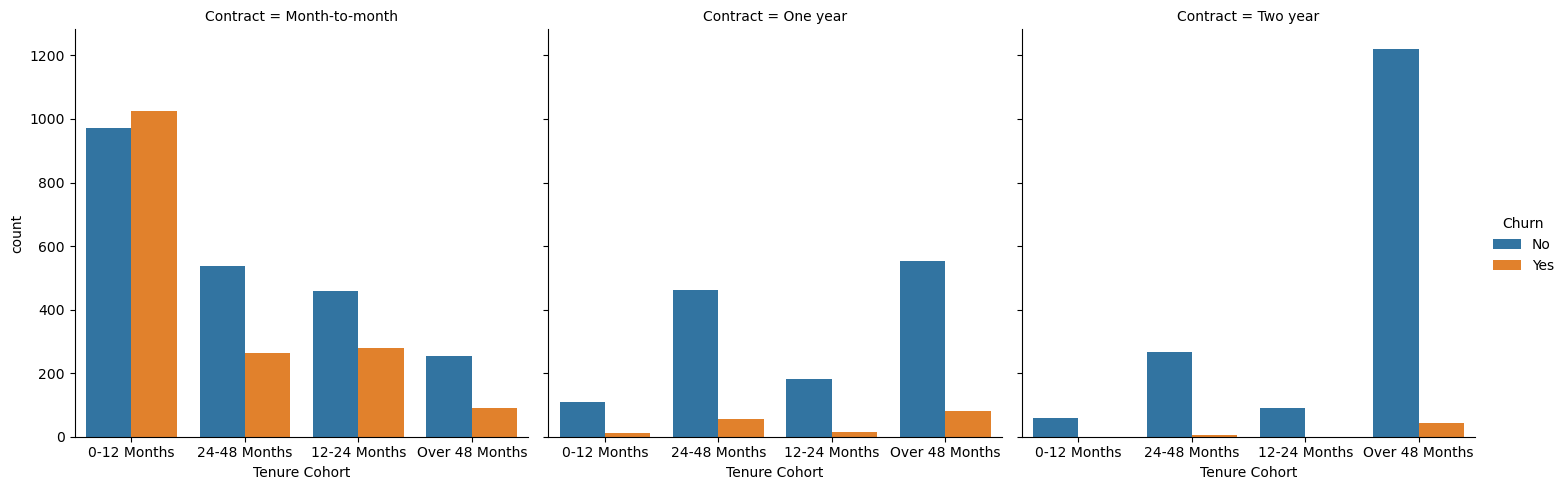

In [30]:
plt.figure(figsize = (10, 6))

sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', col = 'Contract', kind = 'count');

### <a id='Data_Correlation' href=#1> Data Correlation </a>

In this section, we look at the correlation between the features and label.

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


Converting categorical features to dummy variables:

Labels:
- 0: No Churn
- 1: Yes Churn

In [32]:
# For low feature count: map features with 2 unique values to 0 and 1 and get dummy
# For huge feature count: drop first column of dummies
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

# Categorical features of binary values to be mapped
df_dummy = df.copy()
# df_dummy['booking_status'] = label_enc.fit_transform(df_dummy['booking_status'])
df_dummy['Churn'] = df_dummy['Churn'].map({'No': 0, 'Yes': 1}) # To manually map labels according to preference

# Get dummies for remaining categorical features
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_0-12 Months,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0


In [33]:
# Feature correlation to label
df_corr = df_dummy.corr()['Churn'].sort_values()[:-1]
pd.DataFrame(data = df_corr.values, index = df_corr.index, columns = ['Correlation to Churn'])

,Correlation to Churn
tenure,-0.354049
Contract_Two year,-0.301552
Tenure Cohort_Over 48 Months,-0.264035
InternetService_No,-0.227578
OnlineBackup_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
TechSupport_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
OnlineSecurity_No internet service,-0.227578


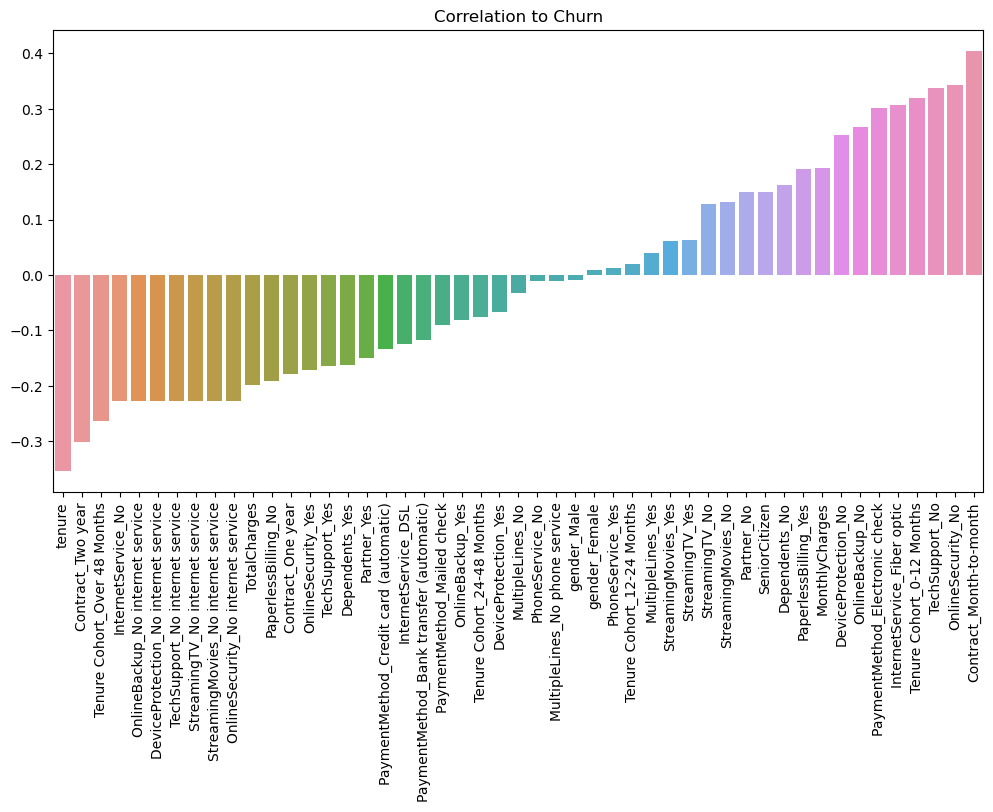

In [34]:
# Feature correlation to label
plt.figure(figsize = (12, 6))
sns.barplot(x = df_corr.index, y = df_corr.values)
plt.title('Correlation to Churn')
plt.xticks(rotation = 90);

To have a clear order on feature correlation to label, we plot the bar plot using absolute values:

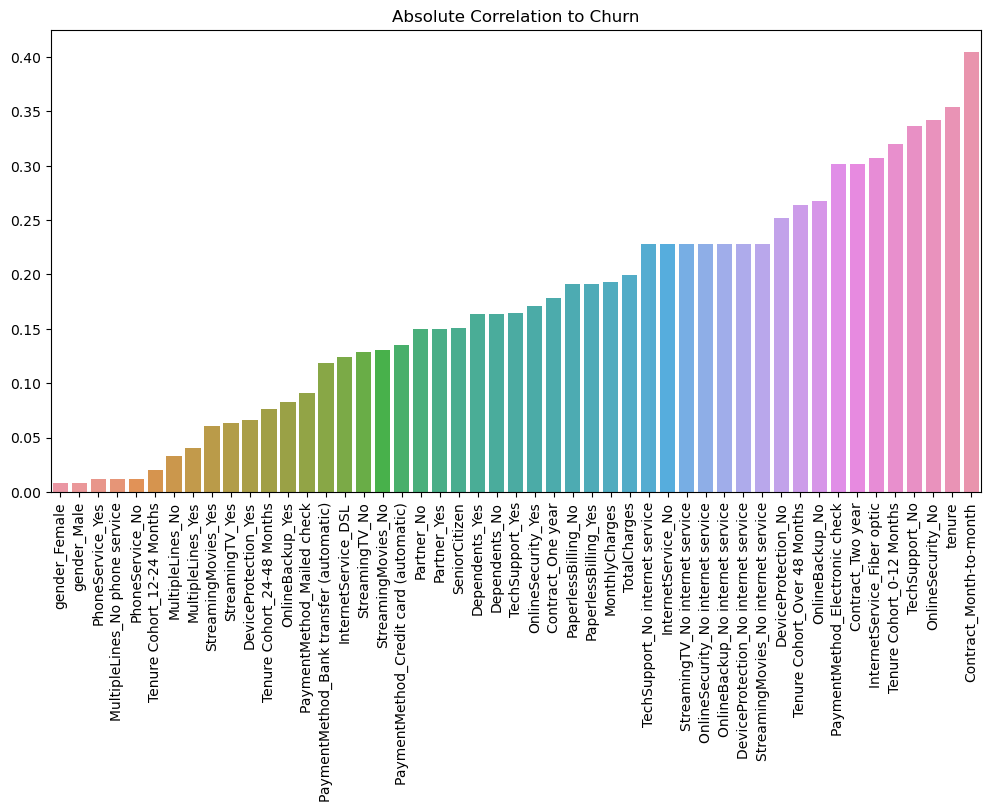

In [35]:
df_corr_abs = abs(df_dummy.corr())['Churn'].sort_values()[:-1]
pd.DataFrame(data = df_corr_abs.values, index = df_corr_abs.index, columns = ['Absolute Correlation to Churn'])

plt.figure(figsize = (12, 6))
sns.barplot(x = df_corr_abs.index, y = df_corr_abs.values)
plt.title('Absolute Correlation to Churn')
plt.xticks(rotation = 90);

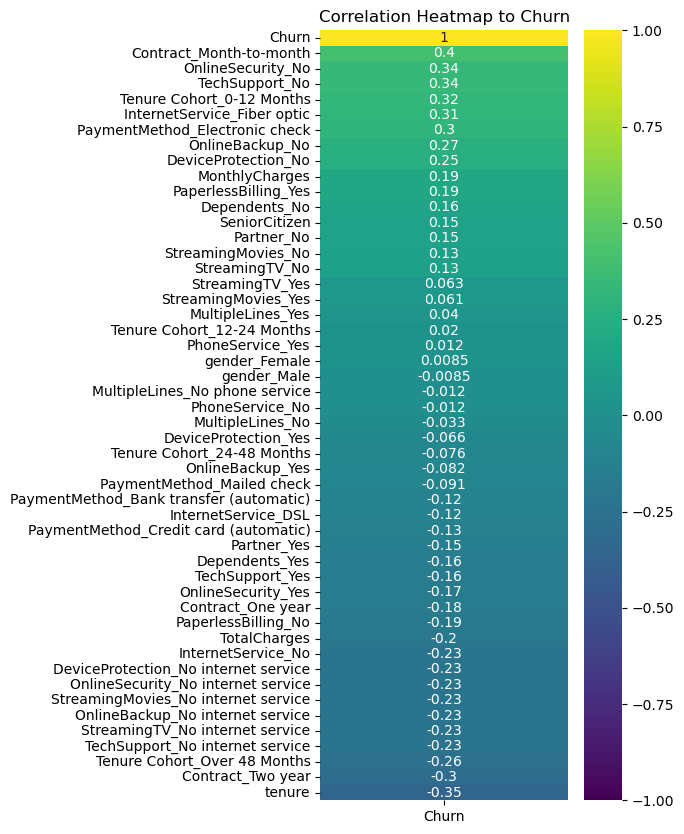

In [36]:
# Correlation between features and label
df_corr_income = df_dummy.corr()['Churn'].sort_values(ascending = False).to_frame()

plt.figure(figsize = (4, 10))
sns.heatmap(data = df_corr_income, cmap = 'viridis', vmin = -1, vmax = 1, annot = True)
plt.title('Correlation Heatmap to Churn');

Observation:
- As predicted during EDA, it can be seen that the **contract and tenure duration** are the features who are most correlated to churn.
- Besides that, **customers not using online security, tech support, online backup and device protection** are also good indicators to determine churn.
- Customers who **uses fibre optic internet service and pays using electronic check** are also strong correlated features.

## <a id='Data_Preparation' href=#1> Data Preparation </a>

In this section, we prepare the data and define some functions to be used for model development.

In [37]:
X = df_dummy.drop('Churn', axis = 1)
y = df_dummy['Churn']

In [38]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Split train-test once if using GridSearchCV, else split train-validation-holdout test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [39]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
# Function to print classification report and confusion matrix
def model_report(model, prediction):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    
    print(classification_report(y_test, prediction))
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()

In [41]:
# Function to calculate cv and ROC_AUC score and plot
def model_score(model, prediction):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import RocCurveDisplay
    
    print('Cross Validation Score: ','{0:.2%}'.format(cross_val_score(model, scaled_X_train, y_train, scoring = 'roc_auc').mean()))
    print('ROC_AUC Score: ','{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    RocCurveDisplay.from_estimator(model, scaled_X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [42]:
# Function to create comparison DF of accuracy score and f1-score for different models
# model_lst = list of model names ['grid_log', 'grid_knn', 'grid_rfc', 'grid_svc', 'grid_gb', 'grid_ab', 'gnb']
# All y_test and all y_pred_(model_lst) variables must be defined
def error_compare_classification_binary(model_lst):
    from sklearn.metrics import accuracy_score, f1_score
    columns = ['Accuracy Score (higher better)', 'F1-Score [0: No Churn] (closer to 1 better)', 'F1-Score [1: Yes Churn] (closer to 1 better)']
    data_lst = []

    for model in model_lst:
        temp_lst = []
        y_pred_func = globals()[f'y_pred_{model}']
        temp_lst.append(round(accuracy_score(y_test, y_pred_func), 2))
        temp_lst.append(round(f1_score(y_test, y_pred_func, pos_label = 0), 2)) # pos_label = 0 & 1 for binary
        temp_lst.append(round(f1_score(y_test, y_pred_func, pos_label = 1), 2))
        data_lst.append(temp_lst)

    return pd.DataFrame(data = data_lst, index = model_lst, columns = columns)

## <a id='Model_Development' href=#1> Model Development </a>

The model is developed using the processed data. Multiple machine learning algorithms are used while tuning the hyperparameters to ensure the best model is developed.

In [43]:
from sklearn.model_selection import GridSearchCV

### <a id='Decision_Tree_Classifier_with_GridSearch_(grid_dtc)' href=#1> Decision Tree Classifier with GridSearch (grid_dtc) </a>

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [None, 5, 10, 15, 20]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
max_features = [None, 'auto', 'sqrt', 'log2', 5, 10]
param_grid_dtc = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

grid_dtc = GridSearchCV(dtc, param_grid_dtc)
grid_dtc.fit(scaled_X_train, y_train)
grid_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'splitter': 'random'}

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1580
           1       0.65      0.41      0.50       530

    accuracy                           0.80      2110
   macro avg       0.74      0.67      0.69      2110
weighted avg       0.78      0.80      0.78      2110



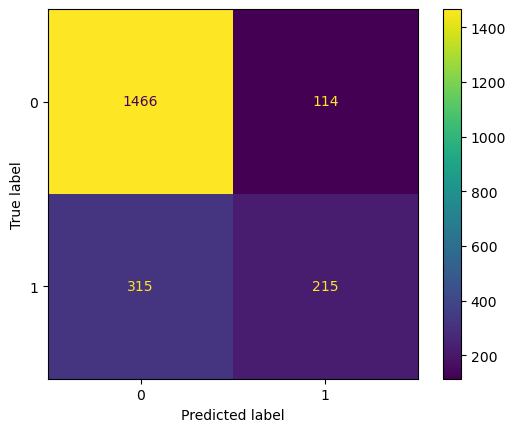

In [45]:
y_pred_grid_dtc = grid_dtc.predict(scaled_X_test)
model_report(grid_dtc, y_pred_grid_dtc)

Cross Validation Score:  83.50%
ROC_AUC Score:  66.68%


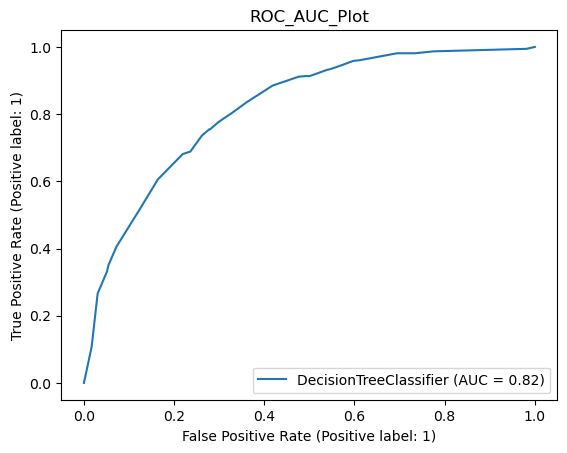

In [46]:
model_score(grid_dtc.best_estimator_, y_pred_grid_dtc)

### <a id='Random_Forest_Classifier_with_GridSearch_(grid_rfc)' href=#1> Random Forest Classifier with GridSearch (grid_rfc) </a>

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
n_estimators = [64, 100, 128, 200]
max_features = ["sqrt", "log2", None]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfc = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}

grid_rfc = GridSearchCV(rfc, param_grid_rfc)
grid_rfc.fit(scaled_X_train, y_train)
grid_rfc.best_params_

{'bootstrap': True,
 'max_features': None,
 'n_estimators': 100,
 'oob_score': False}

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1580
           1       0.59      0.52      0.55       530

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



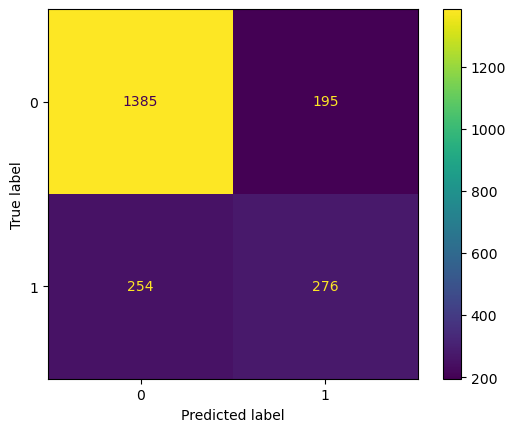

In [48]:
y_pred_grid_rfc = grid_rfc.predict(scaled_X_test)
model_report(grid_rfc, y_pred_grid_rfc)

Cross Validation Score:  82.76%
ROC_AUC Score:  69.87%


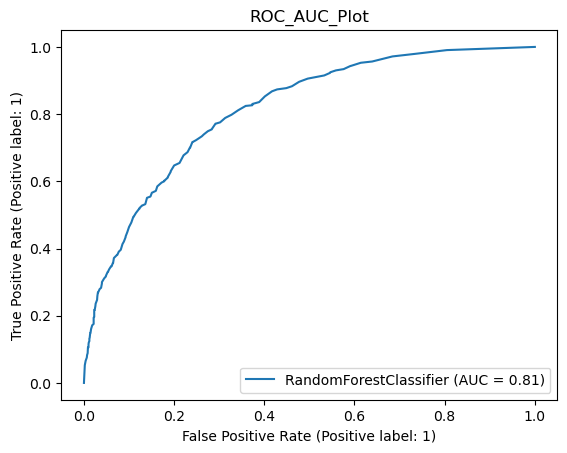

In [49]:
model_score(grid_rfc.best_estimator_, y_pred_grid_rfc)

### <a id='Extreme_Gradient_Boost_with_GridSearch_(grid_xgb)' href=#1> Extreme Gradient Boost with GridSearch (grid_xgb) </a>

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
min_child_weight = [1, 3, 5]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
param_grid_xgb = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid_xgb = GridSearchCV(xgb, param_grid_xgb)
grid_xgb.fit(scaled_X_train, y_train)
grid_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 50,
 'subsample': 0.8}

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.53      0.59       530

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



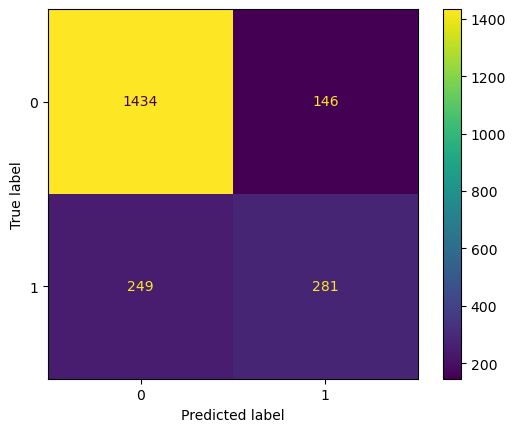

In [51]:
y_pred_grid_xgb = grid_xgb.predict(scaled_X_test)
model_report(grid_xgb, y_pred_grid_xgb)

Cross Validation Score:  85.30%
ROC_AUC Score:  71.89%


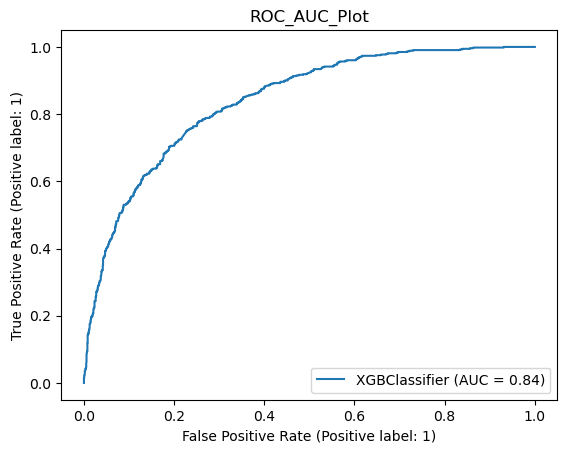

In [52]:
model_score(grid_xgb.best_estimator_, y_pred_grid_xgb)

## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for different algorithms.
- Accuracy: Ratio of correct prediction count (TP + TN) by total predictions made.
- Precision: Ratio of TP count to total TP count made by model.
- Recall: Ratio of TP count to total actual positive count.
- F1-Score: Sensitive to low values, will only be high when precision and recall is high.

In [53]:
index = ['grid_dtc', 'grid_rfc', 'grid_xgb']
df_error_compare = error_compare_classification_binary(index) # self defined function
df_error_compare

,Accuracy Score (higher better),F1-Score [0: No Churn] (closer to 1 better),F1-Score [1: Yes Churn] (closer to 1 better)
grid_dtc,0.80,0.87,0.50
grid_rfc,0.79,0.86,0.55
grid_xgb,0.81,0.88,0.59


Sorting the dataframe to view the best model for each categories:

In [54]:
print('Sorted by best Accuracy Score:')
df_error_compare.sort_values('Accuracy Score (higher better)', ascending = False)

Sorted by best Accuracy Score:


,Accuracy Score (higher better),F1-Score [0: No Churn] (closer to 1 better),F1-Score [1: Yes Churn] (closer to 1 better)
grid_xgb,0.81,0.88,0.59
grid_dtc,0.80,0.87,0.50
grid_rfc,0.79,0.86,0.55


In [55]:
print('Sorted by best F1-Score [0]:')
df_error_compare.sort_values('F1-Score [0: No Churn] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [0]:


,Accuracy Score (higher better),F1-Score [0: No Churn] (closer to 1 better),F1-Score [1: Yes Churn] (closer to 1 better)
grid_xgb,0.81,0.88,0.59
grid_dtc,0.80,0.87,0.50
grid_rfc,0.79,0.86,0.55


In [56]:
print('Sorted by best F1-Score [1]:')
df_error_compare.sort_values('F1-Score [1: Yes Churn] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [1]:


,Accuracy Score (higher better),F1-Score [0: No Churn] (closer to 1 better),F1-Score [1: Yes Churn] (closer to 1 better)
grid_xgb,0.81,0.88,0.59
grid_rfc,0.79,0.86,0.55
grid_dtc,0.80,0.87,0.50


Observation:
1. grid_xgb has the highest accuracy score and F1-score out of all the algorithms. Meaning it is the most accurate in predicting the labels of the dataset, with an **accuracy score of 81% and F1-scores of 88% and 59% for 'No Churn' and 'Yes Churn'.**
2. grid_dtc has the 2nd highest accuracy and F1-scores. However, the scores are close to grid_xgb with 80% accuracy score and F1-score of 87% and 56%.
3. grid_rfc has the lowest scores of 79%, 87% and 55%.

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. By performing EDA, we determined that **contract and tenure duration** are the features most correlated to churn. The churn percentage is higher in customers subscribed to monthly contracts with a low tenure. Customers subscibing to 1 or 2 year plans are less likely to churn. Customers whose tenure are above 20 years have churn percentage below 30%.
2. **Usage of services like online security, tech support, online backup and device protection** are also indicators to determine churn, whereby a higher amount of customers who do not use these services churn compared to those who do.
3. **Fibre optic internet service** users and customers who **pay using electronic check** are also highly likely to churn.
4. Customers who churn have **higher charge for their contracts** compared to those who retain their subscription. This is especially obvious for those with **1 and 2 year contracts.** As their tenure increase, their total charge increases exponentially which might cause dissatisfaction of the customer.
5. For customers with monthly contracts, the monthly charges between those who churn and those who do not is almost similar. In fact, the majority of those who churn have slightly lower charges compared to their counterparts.
6. Based on the evaluation methods, the **best model is the Extreme Gradient Boost (grid_xgb) model** as it has the **highest accuracy (81%)** and **F1-scores (88% & 59%)**. Besides, grid_xgb has the **highest recall for Churn at 53%**, which means we are able to determine 53% of potential churn customers.

## <a id='Recommendation' href=#1> Recommendation </a>

From the conclusions made, I will recommend that:
1. The telco company should always **provide a good first impression to new customers** as those are the customers who are most likely to churn. Once the customers have a longer tenure, the churn percentage decreases.
2. **Incentives should be given for subscribing to 1 or 2 year contracts** such as discounts, faster data speed, higher data limit or free gifts as the churn probability is lower for long term contracts.
3. Effort should be made to **convince customers who are only looking for short term services to continue their subscription after their terms.**
4. **Online security, tech support, online backup and device protection services should be promoted** to encourage customers to subscribe to these services as users of these services typically stay with the service provider throughout their device lifetime.
5. The telco company must **investigate the reason for high churn rate in fibre optic internet service users.** Speed and stability of internet connection is a high priority for customers. The fibre optics team should diagnose their services to identify and rectify any issues on their service connection to ensure their customers do not churn.
6. The telco company should **review the contracts of customers which have charges above the mean value when nearing the end of its term** to ensure they are not unfairly charged. A reduction of charge for those who have been paying higher than the mean will encourage the customers to renew their subscriptions for another term.